# Estudo do Capítulo 9

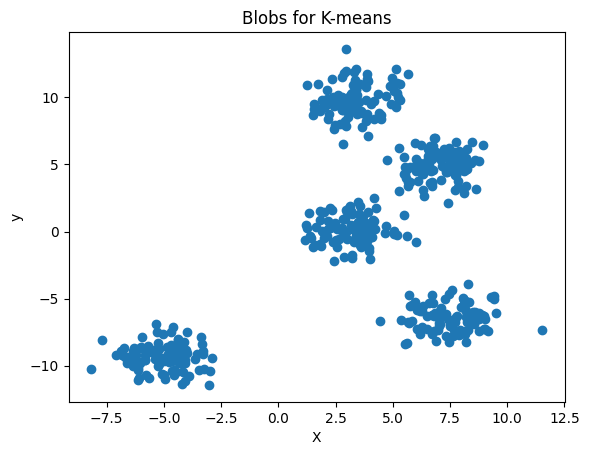

In [4]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

X, y = blobs = make_blobs(500, 2, centers=5, random_state=18)

plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("X")
plt.ylabel("y")
plt.title("Blobs for K-means")
plt.show()


In [5]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(5)
y_pred = kmeans.fit_predict(X)
y_pred


array([3, 4, 0, 2, 2, 4, 1, 1, 3, 0, 2, 1, 3, 3, 0, 1, 0, 0, 4, 1, 4, 0,
       2, 2, 2, 1, 3, 1, 1, 1, 4, 2, 2, 1, 1, 3, 1, 4, 4, 3, 4, 1, 4, 0,
       3, 4, 3, 0, 0, 2, 2, 2, 2, 4, 0, 0, 3, 3, 3, 2, 2, 2, 2, 1, 4, 0,
       4, 4, 0, 3, 1, 3, 0, 2, 2, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 4, 3, 0,
       3, 3, 2, 2, 3, 0, 1, 2, 1, 0, 2, 4, 0, 0, 3, 1, 3, 1, 0, 1, 0, 1,
       1, 3, 4, 2, 1, 0, 0, 1, 2, 0, 0, 3, 3, 4, 4, 2, 0, 2, 0, 0, 1, 2,
       2, 0, 0, 4, 0, 4, 1, 4, 3, 2, 3, 0, 0, 1, 4, 3, 3, 2, 1, 1, 4, 3,
       2, 3, 4, 1, 3, 2, 1, 0, 4, 3, 0, 1, 4, 2, 1, 4, 3, 3, 2, 2, 3, 1,
       1, 1, 1, 2, 2, 3, 0, 3, 4, 3, 4, 2, 1, 4, 4, 3, 1, 4, 4, 2, 0, 3,
       2, 2, 2, 3, 1, 4, 4, 2, 0, 4, 2, 1, 1, 2, 4, 3, 3, 1, 1, 0, 2, 0,
       3, 0, 4, 2, 2, 4, 1, 0, 2, 1, 2, 4, 4, 4, 0, 3, 0, 3, 4, 0, 1, 1,
       2, 0, 1, 3, 0, 1, 4, 0, 3, 0, 2, 3, 4, 1, 2, 1, 0, 2, 3, 3, 4, 3,
       3, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 4, 3, 0, 0, 4, 0, 1, 3, 0, 3, 2,
       1, 2, 4, 0, 1, 2, 3, 0, 0, 2, 3, 3, 4, 3, 0,

In [6]:
kmeans.cluster_centers_

array([[ 7.02337673,  4.8813416 ],
       [-5.05111975, -9.3483554 ],
       [ 7.52334172, -6.44438547],
       [ 3.32182693,  9.76896355],
       [ 3.17146662,  0.15360386]])

In [7]:
import numpy as np

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]]) 
kmeans.predict(X_new)

array([4, 4, 4, 4], dtype=int32)

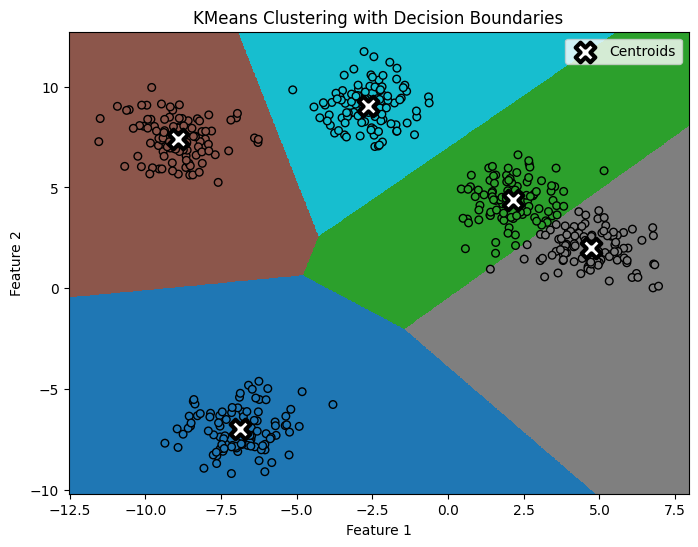

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate data
X, y_true = make_blobs(n_samples=500, centers=5, random_state=42)

# Fit KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)

# Plotting decision boundaries
# Step size of the mesh
h = 0.02  

# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict cluster for each point in the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.tab10,
           aspect='auto', origin='lower')

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=30, cmap=plt.cm.tab10, edgecolor='k')

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='X', s=200, linewidths=3,
            color='white', edgecolor='black', label='Centroids')

plt.title("KMeans Clustering with Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
